In [1]:
# import os, sys
# sep = os.sep
# # Добавить в путь до родительской папки\n",
# sys.path.append(os.path.join(sys.path[0], f'..{sep}'))
# #sys.path.append(os.path.join(os.getcwd(), f'..{sep}'))

In [2]:
import numpy as np
import matplotlib.pyplot as plt
#
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as T

%matplotlib inline

# 1. Data Types in PyTorch 

In [3]:
heights = [
    189, 170, 189, 163, 183, 171, 185,
    168, 173, 183, 173, 173, 175, 178,
    183, 193, 178, 173, 174, 183, 183,
    180, 168, 180, 170, 178, 182, 180,
    183, 178, 182, 188, 175, 179, 183,
    193, 182, 183, 177, 185, 188, 188,
    182, 185, 191, 183
]

In [4]:
heights_tensor = torch.tensor(heights, dtype=torch.float64)
heights_tensor

tensor([189., 170., 189., 163., 183., 171., 185., 168., 173., 183., 173., 173.,
        175., 178., 183., 193., 178., 173., 174., 183., 183., 180., 168., 180.,
        170., 178., 182., 180., 183., 178., 182., 188., 175., 179., 183., 193.,
        182., 183., 177., 185., 188., 188., 182., 185., 191., 183.],
       dtype=torch.float64)

In [5]:
t1=torch.IntTensor([1, 2, 3])
t2=torch.tensor([1, 2, 3], dtype=torch.int)

print(t1)
print(t2)

tensor([1, 2, 3], dtype=torch.int32)
tensor([1, 2, 3], dtype=torch.int32)


In [6]:
tensor1 = torch.zeros(2, 3)
print(tensor1)

tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [7]:
tensor2 = torch.ones(1, 4, 5)
print(tensor2)

tensor([[[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]]])


In [8]:
nparr = np.array(range(10))

pt_tensor = torch.tensor(nparr, dtype=torch.int)
print(pt_tensor)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=torch.int32)


In [9]:
height = heights_tensor[2]
print(height)

tensor(189., dtype=torch.float64)


In [10]:
height = heights_tensor[-2]
print(height)

tensor(191., dtype=torch.float64)


In [11]:
five_heights = heights_tensor[-5:]
print(five_heights)

tensor([188., 182., 185., 191., 183.], dtype=torch.float64)


In [12]:
print(heights_tensor.shape)

torch.Size([46])


In [13]:
heights_in_feet = heights_tensor / 30.48
print(heights_in_feet)

tensor([6.2008, 5.5774, 6.2008, 5.3478, 6.0039, 5.6102, 6.0696, 5.5118, 5.6759,
        6.0039, 5.6759, 5.6759, 5.7415, 5.8399, 6.0039, 6.3320, 5.8399, 5.6759,
        5.7087, 6.0039, 6.0039, 5.9055, 5.5118, 5.9055, 5.5774, 5.8399, 5.9711,
        5.9055, 6.0039, 5.8399, 5.9711, 6.1680, 5.7415, 5.8727, 6.0039, 6.3320,
        5.9711, 6.0039, 5.8071, 6.0696, 6.1680, 6.1680, 5.9711, 6.0696, 6.2664,
        6.0039], dtype=torch.float64)


In [14]:
heights_2_measures = torch.cat([heights_tensor, heights_in_feet], dim=0)
#print(heights_2_measures)
print(heights_2_measures.shape)

torch.Size([92])


In [15]:
heights_reshaped = heights_2_measures.reshape(2, 46)
print(heights_reshaped)

tensor([[189.0000, 170.0000, 189.0000, 163.0000, 183.0000, 171.0000, 185.0000,
         168.0000, 173.0000, 183.0000, 173.0000, 173.0000, 175.0000, 178.0000,
         183.0000, 193.0000, 178.0000, 173.0000, 174.0000, 183.0000, 183.0000,
         180.0000, 168.0000, 180.0000, 170.0000, 178.0000, 182.0000, 180.0000,
         183.0000, 178.0000, 182.0000, 188.0000, 175.0000, 179.0000, 183.0000,
         193.0000, 182.0000, 183.0000, 177.0000, 185.0000, 188.0000, 188.0000,
         182.0000, 185.0000, 191.0000, 183.0000],
        [  6.2008,   5.5774,   6.2008,   5.3478,   6.0039,   5.6102,   6.0696,
           5.5118,   5.6759,   6.0039,   5.6759,   5.6759,   5.7415,   5.8399,
           6.0039,   6.3320,   5.8399,   5.6759,   5.7087,   6.0039,   6.0039,
           5.9055,   5.5118,   5.9055,   5.5774,   5.8399,   5.9711,   5.9055,
           6.0039,   5.8399,   5.9711,   6.1680,   5.7415,   5.8727,   6.0039,
           6.3320,   5.9711,   6.0039,   5.8071,   6.0696,   6.1680,   6.1680,
  

In [16]:
print(heights_reshaped[1,-2])

tensor(6.2664, dtype=torch.float64)


In [17]:
print(torch.median(heights_reshaped[0, :]))

tensor(182., dtype=torch.float64)


In [18]:
# dim=1: По каждой строке (свертка колонок)
print(torch.mean(heights_reshaped, dim=1))

tensor([180.0652,   5.9077], dtype=torch.float64)


In [19]:
# dim=1: По каждой строке (свертка колонок)
values, indices = torch.max(heights_reshaped, dim=1)

print(values)
print(indices)

tensor([193.0000,   6.3320], dtype=torch.float64)
tensor([15, 15])


# 2. An End-to-End Deep Learning Project with PyTorch

In [20]:
torch.manual_seed(42)

transform = T.Compose([
    # Converts image pixels to PyTorch tensors
    # From range [0, 255] to range [0.0, 1.0]
    T.ToTensor(),
    # Normalizes the values to the range [–1.0, 1.0]
    # вычитаем 0.5 из данных и разделить разницу на 0.5
    T.Normalize([0.5], [0.5])
])

# Нормализация входных данных до диапазона [–1, 1]
# позволяет градиентному спуску работать более эффективно

In [21]:
train_set = torchvision.datasets.FashionMNIST( # Which dataset to download
    root='.',       # Where to save the data
    train=True,     # The training or test dataset
    download=True,  # Whether or not to download the data to your computer
    transform=transform  # Performs data transformation
)

test_set = torchvision.datasets.FashionMNIST(
    root='.',
    train=False,     # The training or test dataset
    download=True,
    transform=transform
)

In [22]:
len(train_set), len(test_set)

(60000, 10000)

In [23]:
#print(train_set[0])
print(type(train_set[0]))

item_first = train_set[0]
# Тензор с нормированными пикселями
print(item_first[0].shape)
# Метка класса
print(item_first[1])

<class 'tuple'>
torch.Size([1, 28, 28])
9


In [24]:
# Ссылка на название меток для 10-ти классов https://github.com/pranay414/Fashion-MNIST-Pytorch 
text_labels = [
    't-shirt', 'trouser', 'pullover', 'dress', 'coat',
    'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot'
]

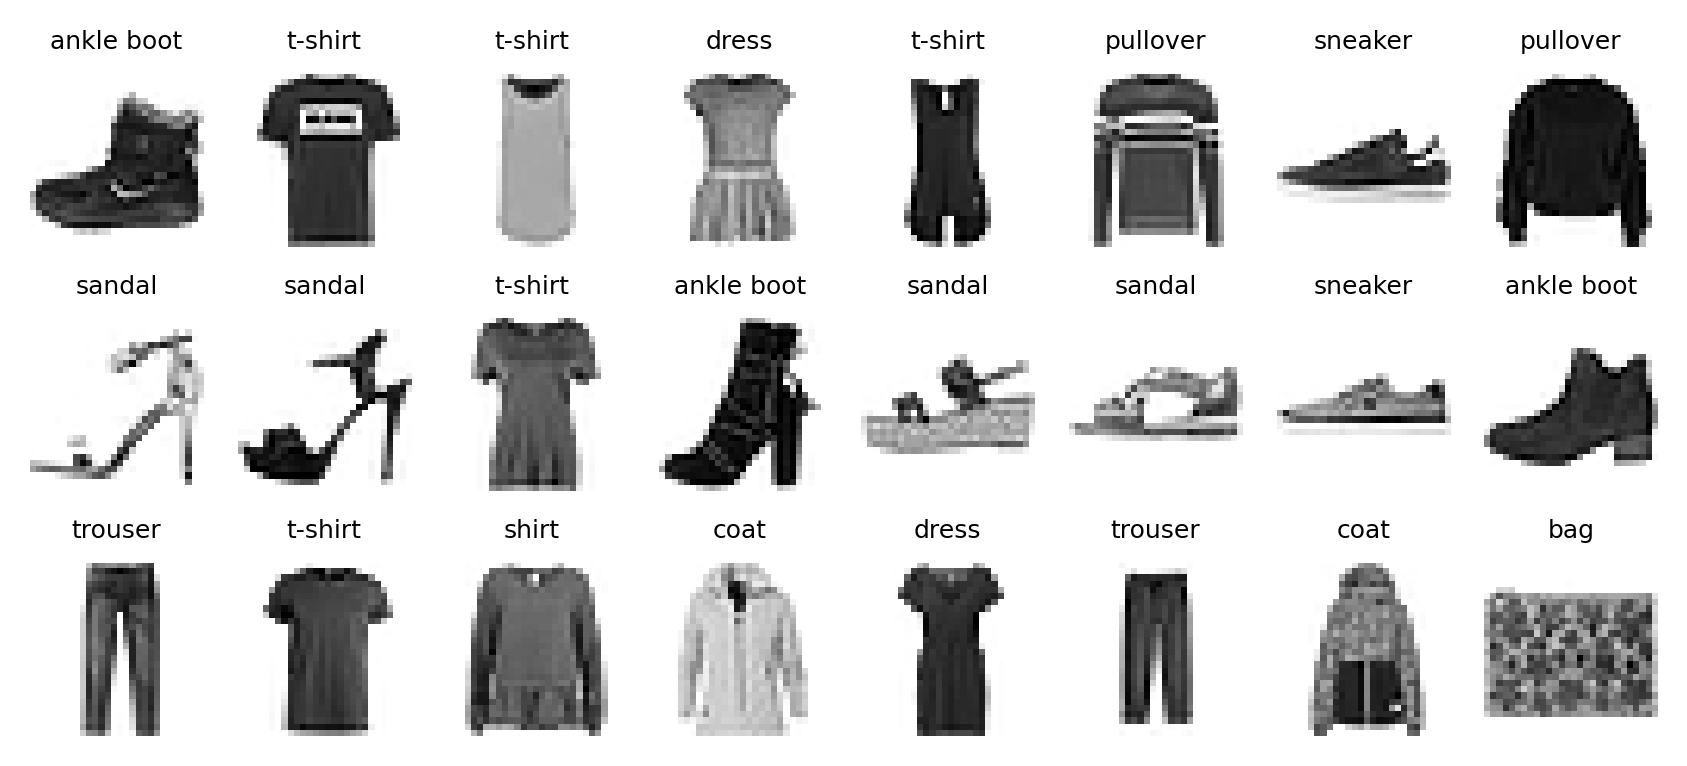

In [25]:
plt.figure(figsize=(7, 3), dpi=300)

for i in range(24):
    ax = plt.subplot(3, 8, i + 1)
    # Тензор с нормироованными пикселями
    img = train_set[i][0]
    # Масштабировние значений в диапазон [0.0, 1.0]
    img = img/2 + 0.5
    # Удалить цветовой канал
    img = img.reshape(28, 28)
    #plt.imshow(img, cmap='gray')
    plt.imshow(img, cmap='binary')
    plt.axis('off')
    plt.title(text_labels[train_set[i][1]], fontsize=6)

plt.show();

In [48]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

# 3. Binary Classification 

In [27]:
# Оставаить только картинки с классами 0 и 9 ('t-shirt', 'ankle boot')
binary_train_set = [x for x in train_set if x[1] in [0, 9]]
binary_test_set = [x for x in test_set if x[1] in [0, 9]]
#type(binary_train_set)

In [28]:
batch_size = 64

binary_train_loader = torch.utils.data.DataLoader(binary_train_set, batch_size=batch_size, shuffle=True)

binary_test_loader = torch.utils.data.DataLoader(binary_test_set, batch_size=batch_size, shuffle=False)

In [29]:
binary_model = nn.Sequential(
    nn.Linear(28*28, 256), nn.ReLU(),
    nn.Linear(256, 128), nn.ReLU(),
    nn.Linear(128, 32), nn.ReLU(),
    nn.Linear(32, 1),
    nn.Dropout(p=0.25),
    # Сжать число на выходе до диапазона [0.0, 1.0]
    nn.Sigmoid()
).to(device)

In [30]:
# Для себя (чтобы понять)!!!
for n, (imgs, labels) in enumerate(binary_train_loader):
    print(imgs.shape)
    imgs = imgs.reshape(-1, 28*28).to(device)
    print(imgs.shape)
    preds = binary_model(imgs)
    print(preds.shape)
    break

torch.Size([64, 1, 28, 28])
torch.Size([64, 784])
torch.Size([64, 1])


In [31]:
lr = 0.001
optimizer = torch.optim.Adam(binary_model.parameters(), lr=lr)

# Binary cross-entropy loss function (Кросс-энтропия для бинарной классификации)
loss_fn = nn.BCELoss()

In [32]:
# Для себя (чтобы понять)!!!
for n, (imgs, labels) in enumerate(binary_train_loader):
    labels = torch.FloatTensor([x if x == 0 else 1 for x in labels])
    print(labels.shape)
    # Перевести вектор-строку в вектор-столбец
    labels = labels.reshape(-1, 1)
    print(labels.shape)
    break

torch.Size([64])
torch.Size([64, 1])


In [33]:
n_epoch = 50

for epoch in range(n_epoch):
    total_loss = 0
    for n, (imgs, labels) in enumerate(binary_train_loader):
        binary_model.train()
        # torch.Size([batch_size, 1, 28, 28]) => torch.Size([batch_size, 784])
        imgs = imgs.reshape(-1, 28*28)
        imgs = imgs.to(device)
        # Метку 9 перевести в 1
        labels = torch.FloatTensor([x if x == 0 else 1 for x in labels])
        # Перевести вектор-строку в вектор-столбец
        labels = labels.reshape(-1, 1).to(device)

        preds = binary_model(imgs)    
        loss = loss_fn(preds, labels)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        total_loss += loss.detach()
    
    total_loss = total_loss / n
    print(f'At epoch {epoch+1}, loss is {total_loss:.6f}')

At epoch 1, loss is 0.189157
At epoch 2, loss is 0.177363
At epoch 3, loss is 0.178287
At epoch 4, loss is 0.177172
At epoch 5, loss is 0.174322
At epoch 6, loss is 0.176676
At epoch 7, loss is 0.178214
At epoch 8, loss is 0.172668
At epoch 9, loss is 0.175615
At epoch 10, loss is 0.176358
At epoch 11, loss is 0.174672
At epoch 12, loss is 0.172333
At epoch 13, loss is 0.173442
At epoch 14, loss is 0.178992
At epoch 15, loss is 0.175346
At epoch 16, loss is 0.175668
At epoch 17, loss is 0.178153
At epoch 18, loss is 0.172940
At epoch 19, loss is 0.175952
At epoch 20, loss is 0.172361
At epoch 21, loss is 0.175893
At epoch 22, loss is 0.179195
At epoch 23, loss is 0.173924
At epoch 24, loss is 0.176994
At epoch 25, loss is 0.176473
At epoch 26, loss is 0.176125
At epoch 27, loss is 0.178210
At epoch 28, loss is 0.177341
At epoch 29, loss is 0.174851
At epoch 30, loss is 0.172187
At epoch 31, loss is 0.174793
At epoch 32, loss is 0.172881
At epoch 33, loss is 0.170159
At epoch 34, loss i

In [34]:
results = []
for imgs, labels in binary_test_loader:
    binary_model.eval()
    # torch.Size([batch_size, 1, 28, 28]) => torch.Size([batch_size, 784])
    imgs = imgs.reshape(-1, 28*28).to(device)
    # Метку 9 перевести в 1
    labels = torch.FloatTensor([x if x==0 else 1 for x in labels])
    # Перевести вектор-строку в вектор-столбец
    labels = (labels).reshape(-1, 1).to(device)
    preds = binary_model(imgs)

    # Создать вектор-столбец с числами 0 или 1
    pred10 = torch.where(preds > 0.5, 1, 0)
    correct = (pred10 == labels)
    # Вычислить среднее кол-во правильных ответов для batch'а картинок
    results.append(
        correct.detach().cpu().numpy().mean()
    )

accuracy = np.array(results).mean()
print(f'the accuracy of the predictions is {accuracy:.3f}')

the accuracy of the predictions is 1.000


# 4. Multi-Category Classification

In [35]:
batch_size = 64
torch.manual_seed(42)

# 60000 делим на 50000 и 10000
train_set,val_set = torch.utils.data.random_split(train_set, [50000, 10000])

train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True)

val_loader = torch.utils.data.DataLoader(val_set, batch_size=batch_size, shuffle=False)

test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size, shuffle=False)

In [36]:
# Класс для ранней остановки обучения, если loss
# на валидационных даннных перестал уменьшаться
class EarlyStop:
    def __init__(self, patience=10):
        self.patience = patience
        self.steps = 0
        # Максимально возможное большое число для float
        self.min_loss = float('inf')

    def stop(self, val_loss):
        if val_loss < self.min_loss:
            self.min_loss = val_loss
            self.steps = 0
        elif val_loss >= self.min_loss:
            self.steps += 1
        # Если за self.patience эпох, значение функции потерь НЕ уменшилось
        if self.steps >= self.patience:
            return True
        else:
            return False

#stopper = EarlyStop()

In [37]:
model = nn.Sequential(
    nn.Linear(28*28, 256), nn.ReLU(),
    nn.Linear(256, 128), nn.ReLU(),
    nn.Linear(128, 64), nn.ReLU(),
    # На выходе 10 чисел, для 10-ти классов
    nn.Linear(64, 10)
).to(device)

In [38]:
lr = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

# Cross-entropy loss function (Кросс-энтропия для многоклассовой классификации)
loss_fn = nn.CrossEntropyLoss()

# Если использовать nn.LogSoftmax() на выходе в модели, тогда
# в качестве функции потерь нужно юзать nn.NLLLoss()!!!
# см. пример ниже по коду

In [39]:
# Для себя (чтобы понять)!!!
for n, (imgs, labels) in enumerate(train_loader):
    imgs = imgs.reshape(-1, 28*28).to(device)
    labels = labels.reshape(-1,).to(device)
    #
    preds = model(imgs)
    break
print(labels.shape)
print(preds.shape)

torch.Size([64])
torch.Size([64, 10])


In [40]:
def train_epoch():
    model.train()
    train_loss = 0
    
    for n, (imgs, labels) in enumerate(train_loader):
        # torch.Size([batch_size, 1, 28, 28]) => torch.Size([batch_size, 784])
        imgs = imgs.reshape(-1, 28*28).to(device)
        # Перестраховаться, перевести в вектор-строку torch.Size([batch_size])
        labels = labels.reshape(-1,).to(device)

        # Получили матрицу torch.Size([batch_size, 10])
        # 10: Это по одному числу для каждого из 10 классов
        preds = model(imgs)    
        loss = loss_fn(preds, labels)
        
        # Backpropagation
        optimizer.zero_grad()
        loss.backward()    
        optimizer.step()

        train_loss += loss.detach()
    
    return train_loss/n  

In [41]:
def val_epoch():
    model.eval()
    val_loss = 0

    for n, (imgs, labels) in enumerate(val_loader):
        # torch.Size([batch_size, 1, 28, 28]) => torch.Size([batch_size, 784])
        imgs = imgs.reshape(-1, 28*28).to(device)
        # Перестраховаться, перевести в вектор-строку torch.Size([batch_size])
        labels = labels.reshape(-1,).to(device)

        with torch.no_grad():
            # Получили матрицу torch.Size([batch_size, 10])
            # 10: Это по одному числу для каждого из 10 классов
            preds = model(imgs)
            loss = loss_fn(preds,labels)    
        
        val_loss += loss.detach()
    
    return val_loss/n 

In [42]:
stopper = EarlyStop()
n_epoch = 100

for epoch in range(1, n_epoch+1):    
    train_loss = train_epoch()
    val_loss = val_epoch()

    print(f'At epoch {epoch} =>, train_loss is {train_loss:.6f}; val_loss is {val_loss:.6f}')
    # Ранняя остановка обучения
    if stopper.stop(val_loss) == True:             
        break

At epoch 1 =>, train_loss is 0.533790; val_loss is 0.421658
At epoch 2 =>, train_loss is 0.383494; val_loss is 0.390120
At epoch 3 =>, train_loss is 0.341462; val_loss is 0.369035
At epoch 4 =>, train_loss is 0.319737; val_loss is 0.344592
At epoch 5 =>, train_loss is 0.298285; val_loss is 0.363239
At epoch 6 =>, train_loss is 0.281921; val_loss is 0.331880
At epoch 7 =>, train_loss is 0.267157; val_loss is 0.321658
At epoch 8 =>, train_loss is 0.256369; val_loss is 0.327903
At epoch 9 =>, train_loss is 0.244386; val_loss is 0.352823
At epoch 10 =>, train_loss is 0.237009; val_loss is 0.342439
At epoch 11 =>, train_loss is 0.222077; val_loss is 0.311968
At epoch 12 =>, train_loss is 0.214158; val_loss is 0.323625
At epoch 13 =>, train_loss is 0.206082; val_loss is 0.315803
At epoch 14 =>, train_loss is 0.197083; val_loss is 0.314229
At epoch 15 =>, train_loss is 0.191073; val_loss is 0.367919
At epoch 16 =>, train_loss is 0.182970; val_loss is 0.328589
At epoch 17 =>, train_loss is 0.1

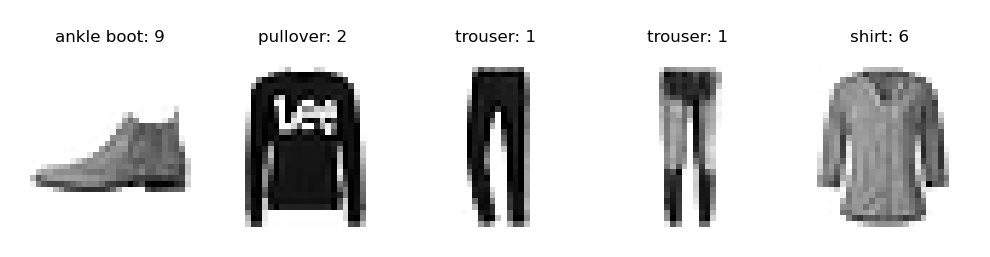

The label is 9; the prediction is 9
The label is 2; the prediction is 2
The label is 1; the prediction is 1
The label is 1; the prediction is 1
The label is 6; the prediction is 6


In [43]:
plt.figure(figsize=(4, 1), dpi=300)

for i in range(5):
    ax=plt.subplot(1, 5, i + 1)    
    # Тензор с нормироованными пикселями
    img = test_set[i][0]    
    # Масштабировние значений в диапазон [0.0, 1.0]    
    img=img/2 + 0.5    
    # Удалить цветовой канал
    img=img.reshape(28, 28)    
    label = test_set[i][1]
    #plt.imshow(img, cmap='gray')
    plt.imshow(img, cmap='binary')
    plt.axis('off')
    plt.title(f'{text_labels[label]}: {label}', fontsize=4)
plt.show();

model.eval()
for i in range(5):
    img, label = test_set[i]
    # torch.Size([1, 28, 28]) => torch.Size([1, 784])
    img = img.reshape(-1, 28*28).to(device)
    # Получили матрицу torch.Size([1, 10])
    pred = model(img)
    # Получить индекс массива с максимальным значением
    # dim=1: По каждой строке (свертка колонок)
    index_pred = torch.argmax(pred, dim=1)
    idx = index_pred.item()
    print(f'The label is {label}; the prediction is {idx}');

In [44]:
model.eval()
results = []

for imgs,labels in test_loader:
    # torch.Size([batch_size, 1, 28, 28]) => torch.Size([batch_size, 784])
    imgs = imgs.reshape(-1, 28*28).to(device)
    # Перестраховаться, перевести в вектор-строку torch.Size([batch_size])
    labels = labels.reshape(-1,).to(device)

    # Получили матрицу torch.Size([batch_size, 10])
    # 10: Это по одному числу для каждого из 10 классов
    preds = model(imgs)

    # Получить индексы массивов с максимальным значением
    # dim=1: По каждой строке (свертка колонок)
    pred10 = torch.argmax(preds, dim=1)
    
    correct = (pred10==labels)
    # Вычислить среднее кол-во правильных ответов для batch'а картинок
    results.append(
        correct.detach().cpu().numpy().mean()
    )
    
accuracy = np.array(results).mean()

print(f'The accuracy of the predictions is {accuracy:.3f}')

The accuracy of the predictions is 0.884


# 5. LogSoftmax

In [45]:
# Демонстрация того, что nn.CrossEntropyLoss() объединяет
# nn.LogSoftmax() и nn.NLLLoss()

model = nn.Sequential(
    nn.Linear(28*28, 256), nn.ReLU(),
    nn.Linear(256, 128), nn.ReLU(),
    nn.Linear(128, 64), nn.ReLU(),
    nn.Linear(64, 10),
    # LogSoftmax activation
    nn.LogSoftmax(dim=1)
).to(device)

lr = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

# Negative log likelihood loss NLLLoss()
loss_fn = nn.NLLLoss()

In [46]:
stopper = EarlyStop()
n_epoch = 100

for epoch in range(1, n_epoch+1):    
    train_loss = train_epoch()
    val_loss = val_epoch()

    print(f'At epoch {epoch} =>, train_loss is {train_loss:.6f}; val_loss is {val_loss:.6f}')
    # Ранняя остановка обучения
    if stopper.stop(val_loss) == True:             
        break

At epoch 1 =>, train_loss is 0.539346; val_loss is 0.443229
At epoch 2 =>, train_loss is 0.386566; val_loss is 0.395284
At epoch 3 =>, train_loss is 0.346767; val_loss is 0.378477
At epoch 4 =>, train_loss is 0.320013; val_loss is 0.352477
At epoch 5 =>, train_loss is 0.300891; val_loss is 0.336025
At epoch 6 =>, train_loss is 0.281791; val_loss is 0.345366
At epoch 7 =>, train_loss is 0.265596; val_loss is 0.336004
At epoch 8 =>, train_loss is 0.255451; val_loss is 0.324615
At epoch 9 =>, train_loss is 0.244829; val_loss is 0.315383
At epoch 10 =>, train_loss is 0.231885; val_loss is 0.347887
At epoch 11 =>, train_loss is 0.220915; val_loss is 0.321235
At epoch 12 =>, train_loss is 0.213562; val_loss is 0.341978
At epoch 13 =>, train_loss is 0.205545; val_loss is 0.319926
At epoch 14 =>, train_loss is 0.195652; val_loss is 0.317619
At epoch 15 =>, train_loss is 0.186805; val_loss is 0.343296
At epoch 16 =>, train_loss is 0.180534; val_loss is 0.344482
At epoch 17 =>, train_loss is 0.1

In [47]:
model.eval()
results = []

for imgs,labels in test_loader:
    imgs = imgs.reshape(-1, 28*28).to(device)
    labels = labels.reshape(-1,).to(device)
    preds = model(imgs)
    pred10 = torch.argmax(preds, dim=1)
    correct = (pred10==labels)
    results.append(
        correct.detach().cpu().numpy().mean()
    )
    
accuracy = np.array(results).mean()

print(f'The accuracy of the predictions is {accuracy:.3f}')

The accuracy of the predictions is 0.882
